<a href="https://colab.research.google.com/github/atharvmendhe18/antariksh_lec_py/blob/main/classify_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.attention.multi_head_attention import activation

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path)
#df.values is a numpy array
X,y = df.values[:, :-1], df.values[:, -1]

X = X.astype('float32')

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1]

(99, 4) (50, 4) (99,) (50,)


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape = (n_features,), activation = 'relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(8, activation = 'relu', kernel_initializer='he_normal'))
#softmax activation for probability based output layer(ig it gives a range of probabilities as i have also used softmax in traffic_sign_detection)
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

#The loss function used is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(X_train,y_train, epochs = 150, batch_size = 32, validation_data = (X_test,y_test))


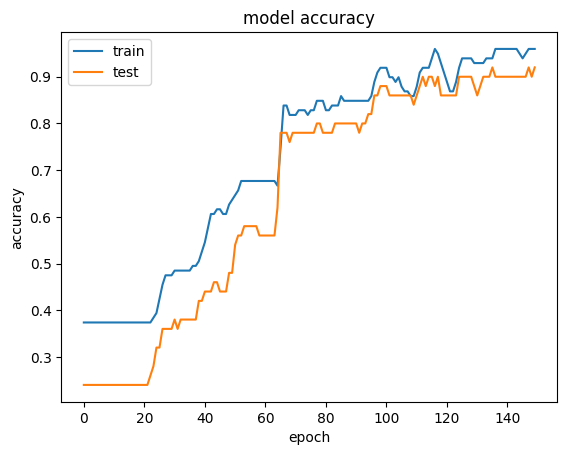

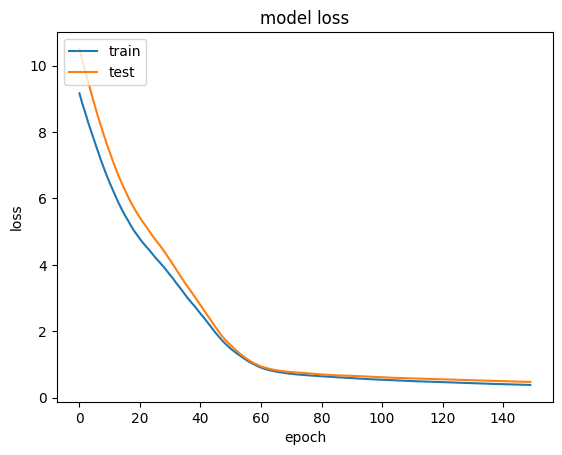

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.save("flowers_iris_predict")

In [ ]:
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])

print(yhat)
print(np.argmax(yhat))

1/1 [==============================] - 0s 41ms/step
[[0.88669854 0.11057454 0.0027269 ]]
0
